# Exploration.ipynb

This notebook will perform data exploration and analysis on the preliminary dataset that we created. We need to analyze this dataset and see if there are any patterns that we may be able to leverage. 

In [35]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

%matplotlib inline

In [36]:
# Getting the dataset
dataset = pd.read_csv('../data/transformed_preliminary_data.csv')
dataset.head(15) # making sure the dataset loaded properly

,Zone,Month,Day,Year,Hour,Total Demand
0,1,6,1,2022,0,0
1,1,6,1,2022,1,0
2,1,6,1,2022,2,0
3,1,6,1,2022,3,0
4,1,6,1,2022,4,1
5,1,6,1,2022,5,0
6,1,6,1,2022,6,3
7,1,6,1,2022,7,0
8,1,6,1,2022,8,0
9,1,6,1,2022,9,0


In [37]:
# Getting the data shape to see how much we are working with
dataset.shape

(197250, 6)

In [38]:
# Checking the value counts of trips
dataset['Total Demand'].value_counts()

0      123762
1       19030
2        6768
3        3763
4        2522
        ...  
590         1
459         1
533         1
454         1
511         1
Name: Total Demand, Length: 543, dtype: int64

In [39]:
# Checking the statistics of the total demand
dataset['Total Demand'].describe()

count    197250.000000
mean         17.805673
std          53.053233
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         654.000000
Name: Total Demand, dtype: float64

In [40]:
# Checking the range of the trips 
print(f'Range of the Demand is: {max(dataset["Total Demand"] - min(dataset["Total Demand"]))}')

Range of the Demand is: 654


In [41]:
# Checking if there are outliers in the trips
unique_trip_number = list(dataset['Total Demand'].unique())
unique_trip_number.sort() # sorting it 
unique_trip_number

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [42]:
# There might be 1 or 2 outliers so I want to see if there are any
# Let's use zscore to do this so we take the high standard deviation into account

# Calculating the zscore of every index
zscores_dict = dict(zscore(dataset['Total Demand']))

# Going through the dictionary to see if any z scores are above 3 or smaller than -3
for index in zscores_dict.keys():
    if zscores_dict[index] > 3 or zscores_dict[index] < -3:
        print(f'Index {index} is probably an outlier because it has a zscore of {zscores_dict[index]}')

Index 31513 is probably an outlier because it has a zscore of 3.792320022510749
Index 31538 is probably an outlier because it has a zscore of 3.73577290094232
Index 31567 is probably an outlier because it has a zscore of 3.0006603205527433
Index 31587 is probably an outlier because it has a zscore of 3.076056482643982
Index 31588 is probably an outlier because it has a zscore of 3.792320022510749
Index 31589 is probably an outlier because it has a zscore of 3.811169063033559
Index 31590 is probably an outlier because it has a zscore of 3.9996594682616555
Index 31591 is probably an outlier because it has a zscore of 3.6603767388510815
Index 31592 is probably an outlier because it has a zscore of 4.433187400286278
Index 31637 is probably an outlier because it has a zscore of 3.6603767388510815
Index 31638 is probably an outlier because it has a zscore of 3.2079997663036495
Index 31642 is probably an outlier because it has a zscore of 3.245697847349269
Index 31662 is probably an outlier b

In [43]:
# Looking at the uniqueness of each feature
for feature in dataset.columns:
    print(f'Feature {feature} has {len(dataset[feature].unique())} features')

Feature Zone has 263 features
Feature Month has 1 features
Feature Day has 30 features
Feature Year has 1 features
Feature Hour has 25 features
Feature Total Demand has 543 features


In [44]:
# Year is useless since the year shouldn't determine the demand since for predictions year will likely be the same for most to all.
# We will keep month, even though we don't have too many differences since month probably does play a role in demand prediction
dataset.drop(['Year'],axis=1,inplace=True)
dataset.head()

,Zone,Month,Day,Hour,Total Demand
0,1,6,1,0,0
1,1,6,1,1,0
2,1,6,1,2,0
3,1,6,1,3,0
4,1,6,1,4,1


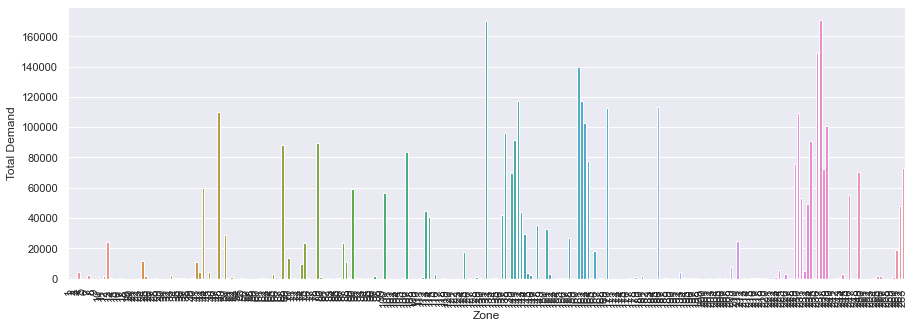

In [56]:
# Looking at how the zone of pickup influences the total demand 
zone_and_demand_df = dataset[['Zone','Total Demand']].copy() # copy of the zone and demand

# Grouping by Zone and just adding up the demand for each hour and each day
grouped_zones = zone_and_demand_df.groupby(['Zone']).sum()
grouped_zones = grouped_zones.reset_index()

# Making a bar chart to see how the zone impacts the total demand
sns.set(rc={'figure.figsize':(15,5)})
plt.xticks(rotation=90) # rotating the ticks
sns.barplot(data=grouped_zones,x='Zone',y='Total Demand')
plt.show()

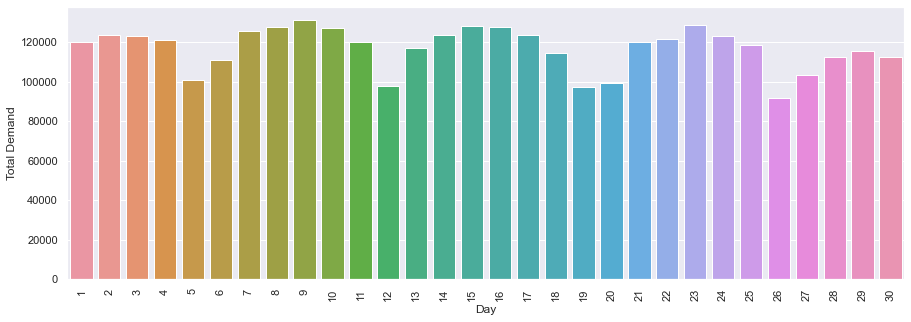

In [63]:
# Looking at how the day of pickup influences the total demand 
day_and_demand_df = dataset[['Day','Total Demand']].copy() # copy of the zone and demand

# Grouping by Zone and just adding up the demand for each hour and each day
grouped_day = day_and_demand_df.groupby(['Day']).sum()
grouped_day = grouped_day.reset_index()

# Making a bar chart to see how the zone impacts the total demand
sns.set(rc={'figure.figsize':(15,5)})
plt.xticks(rotation=90) # rotating the ticks
sns.barplot(data=grouped_day,x='Day',y='Total Demand')
plt.show()

In [70]:
# Demand does fluacate a bit based on the day, however, it is not by much. 
# It would be interesting to see if can engineer a feature that determines the day of the week a day is
# This would probably be more meaningful than using the day number
# June 1st was a wednesday, so we are starting from wednesday and adding the day
day_of_week = ['Wednesday'] # a list to hold the day of the week for the given day

for day in range(1,30):
    if day_of_week[day-1] == 'Monday':
        day_of_week.append('Tuesday')
    elif day_of_week[day-1] == 'Tuesday':
        day_of_week.append('Wednesday')
    elif day_of_week[day-1] == 'Wednesday':
        day_of_week.append('Thursday')
    elif day_of_week[day-1] == 'Thursday':
        day_of_week.append('Friday')
    elif day_of_week[day-1] == 'Friday':
        day_of_week.append('Saturday')
    elif day_of_week[day-1] == 'Saturday':
        day_of_week.append('Sunday')
    elif day_of_week[day-1] == 'Sunday':
        day_of_week.append('Monday')

# Adding days of the week as a column to the data 
grouped_day['Day of Week'] = day_of_week
grouped_day

,Day,Total Demand,Day of Week
0,1,120329,Wednesday
1,2,123870,Thursday
2,3,123242,Friday
3,4,121214,Saturday
4,5,100805,Sunday
5,6,110947,Monday
6,7,125875,Tuesday
7,8,127806,Wednesday
8,9,131317,Thursday
9,10,127207,Friday


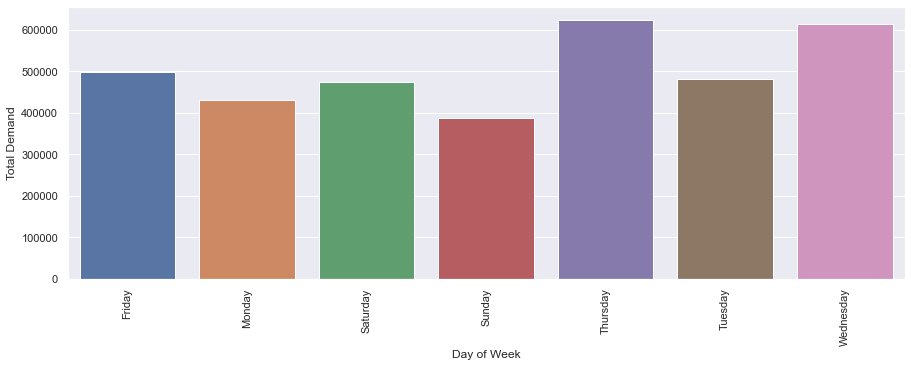

In [71]:
# Grouping by days of the week and seeing if there some significant change in demand
# Hypothesis: Weekends will have more demand than weekdays by a lot because of visitors.
# Looking at how the day of pickup influences the total demand 
day_of_week_and_demand_df = grouped_day[['Day of Week','Total Demand']].copy() # copy of the zone and demand

# Grouping by Zone and just adding up the demand for each hour and each day
grouped_day_of_week = day_of_week_and_demand_df.groupby(['Day of Week']).sum()
grouped_day_of_week = grouped_day_of_week.reset_index()

# Making a bar chart to see how the zone impacts the total demand
sns.set(rc={'figure.figsize':(15,5)})
plt.xticks(rotation=90) # rotating the ticks
sns.barplot(data=grouped_day_of_week,x='Day of Week',y='Total Demand')
plt.show()

In [72]:
# Let's experiment with whether the demand increases or decreases on holidays
# Essentially, we indicate whether or not some day is a holiday
# Hypothesis: Demand decreases on holidays because less people will be in the city for work
grouped_day

,Day,Total Demand,Day of Week
0,1,120329,Wednesday
1,2,123870,Thursday
2,3,123242,Friday
3,4,121214,Saturday
4,5,100805,Sunday
5,6,110947,Monday
6,7,125875,Tuesday
7,8,127806,Wednesday
8,9,131317,Thursday
9,10,127207,Friday
